In [2]:
from sklearn import datasets, metrics, tree, svm, neighbors
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score


SEED = 42

# Decision Tree Model
dtc = DecisionTreeClassifier()

# SVC MODEL

from sklearn.svm import SVC
svc = SVC(random_state = SEED)

# LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# GAUSSIAN NAIVE BAYES
gnb = GaussianNB()

# BERNOULLI NAIVE BAYES
bnb = BernoulliNB()

# Train RandomForestClassifier
rfe = RandomForestClassifier(max_depth=6)

# Train XGBOOST Classifier
from xgboost import XGBClassifier
xgbc = XGBClassifier(eval_metric="logloss", random_state=SEED)

# Train LightGBM Classifier
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(random_state=SEED)

# Train Gradient-Boosting Classifier
grb = GradientBoostingClassifier(learning_rate=1.1)

In [3]:
df = pd.read_csv("NF-UQ-NIDS-v2.csv",index_col=False, nrows=1)
cols = df.columns
df1 = pd.read_csv("NF-UQ-NIDS-v2.csv", header=None, names=cols, skiprows=1, nrows=200000, index_col=False)
df2 = pd.read_csv("NF-UQ-NIDS-v2.csv", header=None, names=cols, skiprows=200001, nrows=200000, index_col=False)
df3 = pd.concat([df1, df2], ignore_index = True)

In [4]:
df3

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack,Dataset
0,192.168.100.148,65389,192.168.100.7,80,6,7.0,420,3,0,0,...,0,35840,140,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
1,192.168.100.148,11154,192.168.100.5,80,6,7.0,280,2,40,1,...,0,0,0,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
2,192.168.1.31,42062,192.168.1.79,1041,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
3,192.168.1.34,46849,192.168.1.79,9110,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
4,192.168.1.30,50360,192.168.1.152,1084,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,192.168.100.149,34255,192.168.100.3,80,17,188.0,140,5,0,0,...,0,0,0,0,0,0,0.0,1,DDoS,NF-BoT-IoT-v2
399996,192.168.100.148,51262,192.168.100.3,80,17,188.0,56,2,0,0,...,0,0,0,0,0,0,0.0,1,DDoS,NF-BoT-IoT-v2
399997,192.168.1.32,48031,192.168.1.186,48319,6,0.0,48,1,0,0,...,0,0,0,0,0,0,0.0,1,scanning,NF-ToN-IoT-v2
399998,192.168.100.147,50363,192.168.100.3,80,6,7.0,280,2,0,0,...,0,0,0,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2


In [5]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(df3['IPV4_SRC_ADDR'])

srcaddr = LE.fit_transform(df1['IPV4_SRC_ADDR'])
df1['IPV4_SRC_ADDR'] = pd.Series(srcaddr)

srcaddr = LE.fit_transform(df2['IPV4_SRC_ADDR'])
df2['IPV4_SRC_ADDR'] = pd.Series(srcaddr)

In [6]:
LE.fit(df3['IPV4_DST_ADDR'])

dstaddr = LE.fit_transform(df1['IPV4_DST_ADDR'])
df1['IPV4_DST_ADDR'] = pd.Series(dstaddr)

dstaddr = LE.fit_transform(df2['IPV4_DST_ADDR'])
df2['IPV4_DST_ADDR'] = pd.Series(dstaddr)

In [31]:
dropcol = {
    'Attack',
    'Label',
    'Dataset',
    'IPV4_DST_ADDR', 
	'IPV4_SRC_ADDR',
    'L4_DST_PORT', 
    'DURATION_IN',
    'MAX_IP_PKT_LEN',
    'SRC_TO_DST_AVG_THROUGHPUT',
    'ICMP_TYPE',
    'SRC_TO_DST_SECOND_BYTES',
    'DST_TO_SRC_SECOND_BYTES',
    'MAX_TTL', 
    'MIN_TTL',
    'OUT_BYTES',
    'TCP_WIN_MAX_IN',
    'OUT_PKTS', 
    'IN_BYTES', 
    'NUM_PKTS_UP_TO_128_BYTES', 
    'IN_PKTS', 
    'CLIENT_TCP_FLAGS',
    'TCP_FLAGS',
    'DNS_QUERY_TYPE',
    'DNS_QUERY_ID',
    'SERVER_TCP_FLAGS', 
    'NUM_PKTS_128_TO_256_BYTES',
    'RETRANSMITTED_IN_PKTS',
    'RETRANSMITTED_IN_BYTES',
    'ICMP_IPV4_TYPE',
    'PROTOCOL',
    'DURATION_OUT',
    'RETRANSMITTED_OUT_PKTS',
    'NUM_PKTS_512_TO_1024_BYTES', 
    'RETRANSMITTED_OUT_BYTES',
    'NUM_PKTS_1024_TO_1514_BYTES', 
    'FTP_COMMAND_RET_CODE'
    }
dropcol=list(dropcol)
X1 = df1
X1_test = df2
for name in dropcol:
    X0 = X1.drop([name], axis=1)
    X1 = X0
Y1 = df1["Attack"]

for name in dropcol:
    X0_test = X1_test.drop([name], axis=1)
    X1_test = X0_test
Y1_test = df2["Attack"]

In [32]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   L4_SRC_PORT                 200000 non-null  int64  
 1   L7_PROTO                    200000 non-null  float64
 2   FLOW_DURATION_MILLISECONDS  200000 non-null  int64  
 3   LONGEST_FLOW_PKT            200000 non-null  int64  
 4   SHORTEST_FLOW_PKT           200000 non-null  int64  
 5   MIN_IP_PKT_LEN              200000 non-null  int64  
 6   DST_TO_SRC_AVG_THROUGHPUT   200000 non-null  int64  
 7   NUM_PKTS_256_TO_512_BYTES   200000 non-null  int64  
 8   TCP_WIN_MAX_OUT             200000 non-null  int64  
 9   DNS_TTL_ANSWER              200000 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 15.3 MB


In [33]:
X1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   L4_SRC_PORT                 200000 non-null  int64  
 1   L7_PROTO                    200000 non-null  float64
 2   FLOW_DURATION_MILLISECONDS  200000 non-null  int64  
 3   LONGEST_FLOW_PKT            200000 non-null  int64  
 4   SHORTEST_FLOW_PKT           200000 non-null  int64  
 5   MIN_IP_PKT_LEN              200000 non-null  int64  
 6   DST_TO_SRC_AVG_THROUGHPUT   200000 non-null  int64  
 7   NUM_PKTS_256_TO_512_BYTES   200000 non-null  int64  
 8   TCP_WIN_MAX_OUT             200000 non-null  int64  
 9   DNS_TTL_ANSWER              200000 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 15.3 MB


In [34]:
LE = LabelEncoder()
LE.fit(df3['Attack'])

multilbl = LE.transform(Y1)
Y1 = pd.Series(multilbl)

multilbl = LE.transform(Y1_test)
Y1_test = pd.Series(multilbl)

In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

X1_object = X1.select_dtypes("object")
X1_int = X1.select_dtypes(exclude = "object")

X1_columns = X1_int.columns

imputer.fit(X1_int)
X1_int = imputer.transform(X1_int)
X1_int = pd.DataFrame(X1_int)
X1_int.columns = X1_columns

X1_object = X1_object.fillna("unknown")
X1 = X1_object.join(X1_int)

In [36]:
X1_object = X1_test.select_dtypes("object")
X1_int = X1_test.select_dtypes(exclude = "object")

X1_columns = X1_int.columns

imputer.fit(X1_int)
X1_int = imputer.transform(X1_int)
X1_int = pd.DataFrame(X1_int)
X1_int.columns = X1_columns

X1_object = X1_object.fillna("unknown")
X1_test = X1_object.join(X1_int)

In [37]:
X_train_1 = X1
X_test_1 =  X1_test
y_train_1 = Y1
y_test_1 = Y1_test

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
# store the columns
cols = X_train_1.columns

# transform the data
X_train_scaled_1 = scaler.fit_transform(X_train_1)
X_test_scaled_1 = scaler.transform(X_test_1)

X_train_scaled_1 = pd.DataFrame(X_train_scaled_1, columns = cols)
X_test_scaled_1 = pd.DataFrame(X_test_scaled_1, columns = cols)

In [39]:
#XGBoost로 테스트용
models_1 = {}
#models_1['SVC']= svc
#models_1['LogisticRegression']= lr
#models_1['DecisionTreeClassifier']= dtc
#models_1['Gaussian Naive Bayes Classifier']= gnb
#models_1['Bernoulli Naive Bayes Classifier']= bnb
#models_1['Gradient Boosting Classifier']= grb
#models_1['Random Forest Classifier']= rfe
models_1['XGBoost Classifier']= xgbc
#models_1['LightGBM Classifier']= lgbmc
preds_1={}
modelAcc_1={}
for name in models_1:
    models_1[name].fit(X_train_scaled_1, y_train_1)
    preds_1[name] = models_1[name].predict(X_test_scaled_1)
    modelAcc_1[name] = accuracy_score(y_test_1, preds_1[name])

print("Predictions complete.")

Predictions complete.


In [40]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
def line(name,sym="*"):
    return sym*(25-len(name)//2)
for name in models_1:
    print(line(name), name, 'Model Testing', line(name))
    print(classification_report(y_test_1, preds_1[name]))

**************** XGBoost Classifier Model Testing ****************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      0.80      0.89        49
           2       0.97      0.99      0.98     66528
           3       0.99      1.00      0.99       353
           4       1.00      0.98      0.99       315
           5       0.99      0.99      0.99     57116
           6       0.98      0.99      0.98     47009
           7       0.70      0.66      0.67        87
           8       0.34      0.38      0.36        60
           9       1.00      0.70      0.82        46
          10       0.80      0.01      0.02       325
          11       0.93      0.80      0.86      6849
          12       0.00      0.00      0.00         5
          13       0.33      0.17      0.22         6
          15       0.85      0.72      0.78      1796
          16       0.33      0.05      0.08        21
          17  

C:\Users\revia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\revia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\revia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

**************** XGBoost Classifier Model Testing ****************


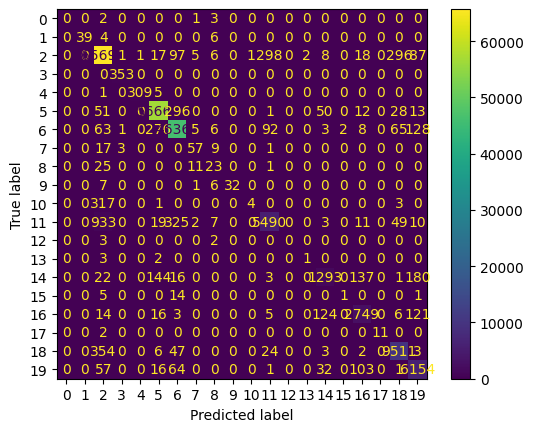

In [41]:
for name in models_1:
    print(line(name), name, 'Model Testing', line(name))
    conf_mat = confusion_matrix(y_true=y_test_1, y_pred=preds_1[name])
    disp = ConfusionMatrixDisplay(conf_mat)
    disp.plot()

In [42]:
for name in models_1:
    modelAcc_1[name] = accuracy_score(y_test_1, preds_1[name])
    print(name, modelAcc_1[name])

XGBoost Classifier 0.973715
